In [19]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

# Étape 1: Créer le répertoire .kaggle et configurer l'API Key
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
kaggle_api_key = '{"username":"username","key":"key"}'  # Remplacez par vos informations
with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as f:
    f.write(kaggle_api_key)
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

# Étape 2: Installer la bibliothèque Kaggle
!pip install kaggle

# Étape 3: Télécharger le dataset Kaggle
dataset = 'puneet6060/intel-image-classification'  # Remplacez par le nom du dataset correct
!kaggle datasets download -d {dataset}

# Étape 4: Décompresser le dataset téléchargé
zip_file = f'{dataset.split("/")[-1]}.zip'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('/kaggle/input/')  # Remplacez par le chemin d'extraction souhaité

print("Dataset téléchargé et extrait avec succès.")





Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset téléchargé et extrait avec succès.


In [15]:
import shutil
from google.colab import files

# Définir le chemin du dossier à compresser
folder_to_zip = '/content/saved_model'

# Définir le chemin du fichier ZIP
output_filename = '/content/saved_model.zip'

# Compresser le dossier en fichier ZIP
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_zip)

# Télécharger le fichier ZIP
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
!pip install kaggle

In [20]:
# Augmentation des données
import os
import cv2
import numpy as np
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

def create_directory_structure(base_dir):
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    for split in ['train', 'validation', 'test']:
        split_dir = os.path.join(base_dir, split)
        if not os.path.exists(split_dir):
            os.makedirs(split_dir)
        for category in ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']:
            category_dir = os.path.join(split_dir, category)
            if not os.path.exists(category_dir):
                os.makedirs(category_dir)

def augment_and_save_images(image_path, save_dir, num_augmented=2, img_width=150, img_height=150):
    # Créer un générateur de données pour l'augmentation avec transformations supplémentaires
    datagen = ImageDataGenerator(
        rotation_range=30,             # Rotation
        width_shift_range=0.2,         # Décalage horizontal
        height_shift_range=0.2,        # Décalage vertical
        shear_range=0.2,               # Cisaillement
        zoom_range=0.2,                # Zoom
        brightness_range=[0.8, 1.2],   # Augmenter la luminosité
        horizontal_flip=True,          # Flip horizontal
        fill_mode='nearest'            # Mode de remplissage pour les nouvelles zones
    )

    # Lire et redimensionner l'image d'origine
    img = cv2.imread(image_path)
    if img is None:
        return
    img = cv2.resize(img, (img_width, img_height))
    img = np.expand_dims(img, 0)  # Ajouter une dimension pour le générateur

    # Copier l'image originale
    base_name = os.path.basename(image_path)
    shutil.copy(image_path, os.path.join(save_dir, base_name))

    # Générer et enregistrer les images augmentées
    for i, batch in enumerate(datagen.flow(img, batch_size=1, save_to_dir=save_dir, save_prefix=os.path.splitext(base_name)[0] + '_aug', save_format='jpg')):
        if i >= num_augmented:
            break

def augment_dataset(dataset_path, save_base_dir, split, img_width=150, img_height=150, num_augmented=2):
    categories = os.listdir(dataset_path)
    for category in tqdm(categories):
        category_path = os.path.join(dataset_path, category)
        save_dir = os.path.join(save_base_dir, split, category)
        for file in os.listdir(category_path):
            if file.endswith('.jpg'):
                file_path = os.path.join(category_path, file)
                augment_and_save_images(file_path, save_dir, num_augmented, img_width, img_height)

# Chemins vers les ensembles d'entraînement, de validation et de test
train_path = "/kaggle/input/seg_train/seg_train"
validation_path = "/kaggle/input/seg_train/seg_train"  # Assumed to be the same as train for demonstration
test_path = "/kaggle/input/seg_test/seg_test"

# Chemin de sauvegarde pour les nouvelles données augmentées
save_base_dir = "/content/augmented_dataset"

# Créer la nouvelle structure de répertoires
create_directory_structure(save_base_dir)

# Augmenter les données dans les ensembles d'entraînement, de validation et de test
augment_dataset(train_path, save_base_dir, 'train')
augment_dataset(validation_path, save_base_dir, 'validation')
augment_dataset(test_path, save_base_dir, 'test')


100%|██████████| 6/6 [01:31<00:00, 15.25s/it]


Found 56133 images belonging to 6 classes.
Found 11999 images belonging to 6 classes.
2024-06-07 03:44:16.630837-04:00
Epoch 1/12
250/250 [==============================] - 336s 1s/step - loss: 1.1395 - accuracy: 0.5461 - val_loss: 1.0233 - val_accuracy: 0.6156
Epoch 2/12
250/250 [==============================] - 323s 1s/step - loss: 0.9412 - accuracy: 0.6348 - val_loss: 0.9349 - val_accuracy: 0.6620
Epoch 3/12
250/250 [==============================] - 303s 1s/step - loss: 0.8521 - accuracy: 0.6777 - val_loss: 0.8178 - val_accuracy: 0.6977
Epoch 4/12
250/250 [==============================] - 321s 1s/step - loss: 0.8060 - accuracy: 0.6988 - val_loss: 0.7759 - val_accuracy: 0.7122
Epoch 5/12
250/250 [==============================] - 298s 1s/step - loss: 0.7603 - accuracy: 0.7159 - val_loss: 0.7790 - val_accuracy: 0.7164
Epoch 6/12
250/250 [==============================] - 296s 1s/step - loss: 0.7380 - accuracy: 0.7259 - val_loss: 0.7246 - val_accuracy: 0.7333
Epoch 7/12
250/250 [===

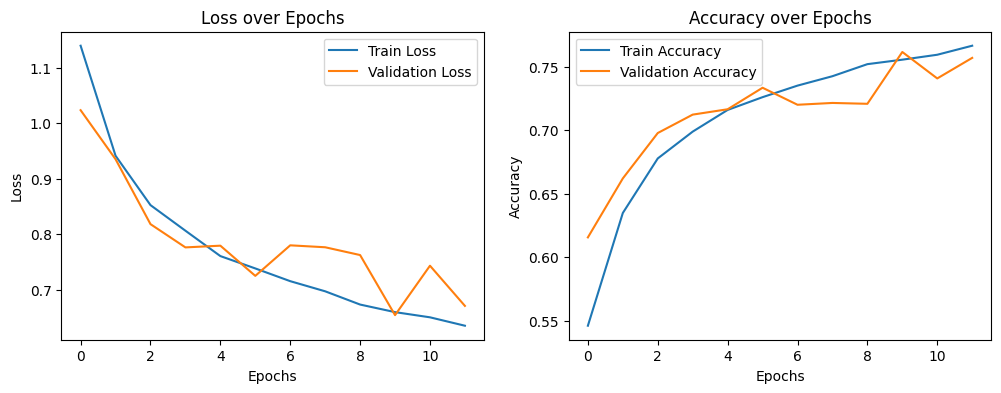

In [21]:
#Entraînement du modèle
import datetime
import pytz
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Définir les chemins d'accès pour les ensembles d'entraînement et de test
train_path = "/content/augmented_dataset/train/"
test_path = "/content/augmented_dataset/test/"

# Paramètres des images
img_width = 50
img_height = 50
batch_size = 224
epoch_num=12

# Création des générateurs d'images avec augmentation des données
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Préparation des générateurs
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse'
)

# Modèle - CNN
# ------------------------------
hiperparameters = {
    'batch_size': batch_size,
    'epochs':epoch_num
}

# Architecture du modèle CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(img_width, img_height, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  # Réduction du nombre de neurones
    tf.keras.layers.Dense(6, activation='softmax')
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
a = datetime.datetime.now(pytz.timezone("America/Montreal"))
print(a)
# Entraîner le modèle
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=hiperparameters['epochs']
)
b = datetime.datetime.now(pytz.timezone("America/Montreal"))
print(b)

print(f"Training time: {b - a}")
# Évaluer le modèle
loss, accuracy = model.evaluate(test_generator)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Sauvegarder le modèle entraîné
model_save_path = "/content/saved_model"
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Visualiser les courbes de perte et de précision
plt.figure(figsize=(12, 4))

# Courbe de perte (loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

# Courbe de précision (accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
